In [2]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle
from IPython.display import Audio
import librosa
import librosa.feature
sr=48000


8.872363596169425 (44100,)
CPU times: user 289 ms, sys: 11.9 ms, total: 301 ms
Wall time: 321 ms


<Figure size 576x360 with 0 Axes>

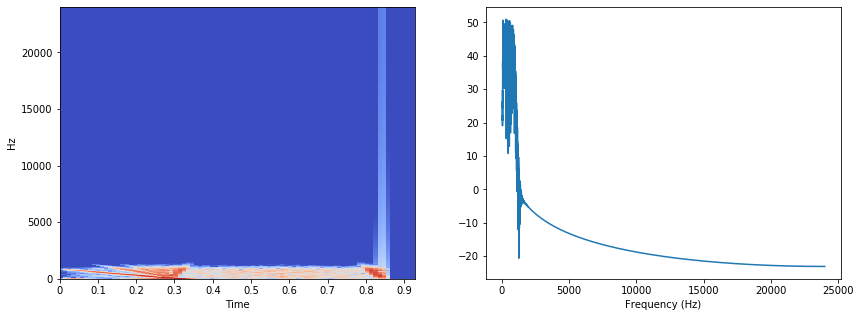

In [113]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params=[]
stack_num=np.random.choice([2])
for i in range(stack_num): 
    p=pg.RandomParams()
#     print(vars(p))
#     print(p.getStart())
    s=pg.Synth(p)
    out.dub(s.buff,p.getStart())
    params.append(p)
out=fx.norm(out,1)

z=librosa.feature.rms(hp.memToAud(out))

print(np.sum(z),hp.memToAud(out).shape)
hp.specShow(out)
Audio(hp.memToAud(out),rate=sr, autoplay=True)


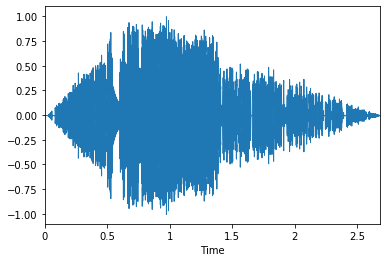

In [43]:
import librosa
librosa.display.waveplot(hp.memToAud(out))

In [37]:
%%time
#generate a lot of sounds
import imp
imp.reload(pg)
imp.reload(hp)

for j in range(4000):
    out = dsp.buffer(length=1,channels=1)
    params=[]
    stack_num=np.random.choice([1,4,8])
    for i in range(stack_num): 
        p=pg.RandomParams()
    #     print(vars(p))
    #     print(p.getStart())
        s=pg.Synth(p)
        out.dub(s.buff,p.getStart())
        params.append(p)
    out=fx.norm(out,1)  
    if hp.memToAud(out).shape[0]<sr:
#         print(hp.memToAud(out).shape[0])
        out.write("./feature_extraction/drum_dbs/dk_data/synth_noise/%s-%d-%d.wav"%(hp.string_generator(),j,stack_num,))
#     with open("generations/pickles/%d.pkl"%j, 'wb') as pfile:
#         pickle.dump(params,pfile,-1)
    

CPU times: user 3min 42s, sys: 1.28 s, total: 3min 43s
Wall time: 4min 14s


In [22]:
### test to see if pickle works
with open("generations/5_stack/pickles/1.pkl", 'rb') as pfile:
    params=pickle.load(pfile)
out = dsp.buffer(length=1,channels=1)
for p in params: 
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
out=fx.norm(out,1)  
sd.play(out,blocking=True)

###actual sound
import librosa as lb
y,sr=lb.core.load("generations/5_stack/sounds/1.wav")
sd.play(y,samplerate=sr)